<a href="https://colab.research.google.com/github/maruson08/2-2/blob/main/Final_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 이미지 데이터 이해하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, AveragePooling2D, Conv2D, Flatten, Dropout, Rescaling

In [ ]:
from keras.preprocessing import image
img = image.load_img('dog.jpg', target_size=(400,500))

In [ ]:
plt.imshow(img)

In [ ]:
img = image.img_to_array(img)
img = img.astype('int32')
print(img.shape) #img는 몇 차원인가?

In [ ]:
print(img)

#2. CNN 모델 구현하기

In [ ]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [ ]:
X_train.shape, y_train.shape

In [ ]:
plt.imshow(X_train[4], interpolation='bicubic')

In [ ]:
X_train = X_train.astype ('float')/255 #무슨 작업인가?
X_test = X_test.astype ('float')/255

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train) #무슨 작업인가?
y_test = to_categorical(y_test)

In [ ]:
model=Sequential()
model.add(Conv2D(32, (3,3),
                 input_shape=(32,32,3),
                 activation='relu',
                 padding='same',
                 strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history=model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))
#train_ds에 배치사이즈 나눠 넣어놨기 때문에 여기서 지정 X

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

#실습하기

In [ ]:
import zipfile, pathlib, tensorflow as tf

with zipfile.ZipFile("cats_and_dogs_100.zip", 'r') as zip_ref: #읽기 모드로 파일 열고 그 파일 객체를 zip_ref라고 함.
    zip_ref.extractall("data") #data 이름의 폴더 만들어서 zip 안의 모든 파일을 data 폴더에 저장

In [ ]:
data_dir = pathlib.Path("data/PetImages") #데이터 저장할 폴더 위치를 변수에 넣어 둠.

#훈련 데이터셋 나누기
train_ds = tf.keras.utils.image_dataset_from_directory( #폴더의 이미지를 한 번에 불러와 일부를 train_ds에 저장
    data_dir, #위에서 정한 폴더 위치
    labels="inferred", #폴더 이름 보고 자동으로 레이블 붙임
    label_mode="int", #레이블을 정수로 표시(알파벳순. cat:0, dog:1)
    image_size=(128,128), #모든 이미지 사이즈 지정
    batch_size=32, #한 번에 이미지 32장씩 묶어서 가져오기
    validation_split=0.2, #전체 데이터의 20%를 검증용으로 사용
    subset="training", #훈련 데이터만 가져와라(0.8만큼). 검증 데이터 가져올 땐 "validation"
    seed=123 #난수 고정값. 훈련/검증 코드에 일치하게 넣어야 함.
)

#검증 데이터셋 나누기
val_ds = #빈칸

In [ ]:
for images, labels in train_ds.take(1): #첫 번째 배치만 꺼냄
    print("이미지 텐서 shape:", images.shape) #몇 차원인가?
    print("라벨 shape:", labels.shape) #몇 차원인가?
    print("라벨 값:", labels.numpy())

    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(f"Label: {labels[0].numpy()}")
    plt.axis("off")
    plt.show()

In [ ]:
model=Sequential()
model.add(Rescaling(1./255, input_shape=(128,128,3)))
#아래 구조가 되도록 설계하시오.

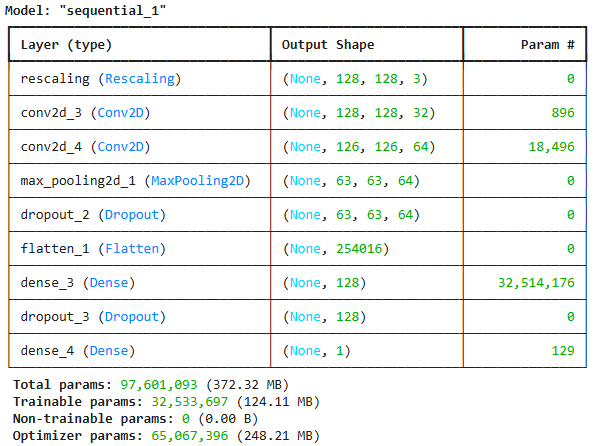

In [ ]:
#학습 준비

In [ ]:
#모델 학습

In [ ]:
#에포크별 훈련/검증 손실함수값 시각화

#예제: MNIST 데이터셋을 분류하는 합성곱 신경망 구현하기

In [ ]:
#MNIST 데이터셋 가져오는 건 C번 코드에서 다룸.